In [480]:
import os

if "notebooks" in os.getcwd():
    %cd ..
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from src.utils.defines import INTERIM_DATA_DIR, AUGMENTED_DATA_DIR, PROCESSED_DATA_DIR
import matplotlib.patches as mpatches

In [178]:
train_df = pd.read_csv(os.path.join(INTERIM_DATA_DIR, "train.csv"))
val_df = pd.read_csv(os.path.join(INTERIM_DATA_DIR, "val.csv"))

train_aug_insertion = pd.read_csv(os.path.join(AUGMENTED_DATA_DIR, "train_augmented_random_insertion_emb.csv"))
train_aug_synonym = pd.read_csv(os.path.join(AUGMENTED_DATA_DIR, "train_augmented_synonym_replacement_emb.csv"))

train_aug_insertion_sf = pd.read_csv(os.path.join(AUGMENTED_DATA_DIR, "sf_train_augmented_random_insertion_emb.csv"))
train_aug_synonym_sf = pd.read_csv(os.path.join(AUGMENTED_DATA_DIR, "sf_train_augmented_synonym_replacement_emb.csv"))

train_rand_swap = pd.read_csv(os.path.join(AUGMENTED_DATA_DIR, "train_augmented_random_swap.csv"))
train_self_training = pd.read_csv(os.path.join(AUGMENTED_DATA_DIR, "task_b_GAB_aug.csv"))
train_self_training_reddit = pd.read_csv(os.path.join(AUGMENTED_DATA_DIR, "task_b_reddit_aug.csv"))

train_self_training_GAB_FULL = pd.read_csv(os.path.join(AUGMENTED_DATA_DIR, "task_a_GAB_aug_99conf_FULL.csv"))
train_self_training_reddit_FULL = pd.read_csv(os.path.join(AUGMENTED_DATA_DIR, "task_a_reddit_aug_99conf_FULL.csv"))

In [179]:
# Explore task a
train_task_a = train_df.drop(['rewire_id', 'target_b', 'target_c'], axis=1)
train_task_a = train_df.copy()

# augment a
GAB_task_a = train_self_training_GAB_FULL.copy()
GAB_task_a = GAB_task_a.drop(['rewire_id', 'target_b', 'target_c'], axis=1)

reddit_task_a = train_self_training_reddit_FULL.copy()
reddit_task_a = reddit_task_a.drop(['rewire_id', 'target_b', 'target_c'], axis=1)

# a1_aug_syn = train_aug_synonym.loc[train_aug_synonym['target_a'] == 1]
# a1_aug_insertion = train_aug_insertion.loc[train_aug_insertion['target_a'] == 1]

C:\Users\jibao\AppData\Local\Temp\ipykernel_32436\4247049562.py:55: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  proxy_artists.append(mpatches.Patch(color=color, label=label, edgecolor='black', alpha=0.8))
C:\Users\jibao\AppData\Local\Temp\ipykernel_32436\4247049562.py:58: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  proxy_artists.append(mpatches.Patch(color='orange', label="augmented data", edgecolor='black', alpha=0.1))


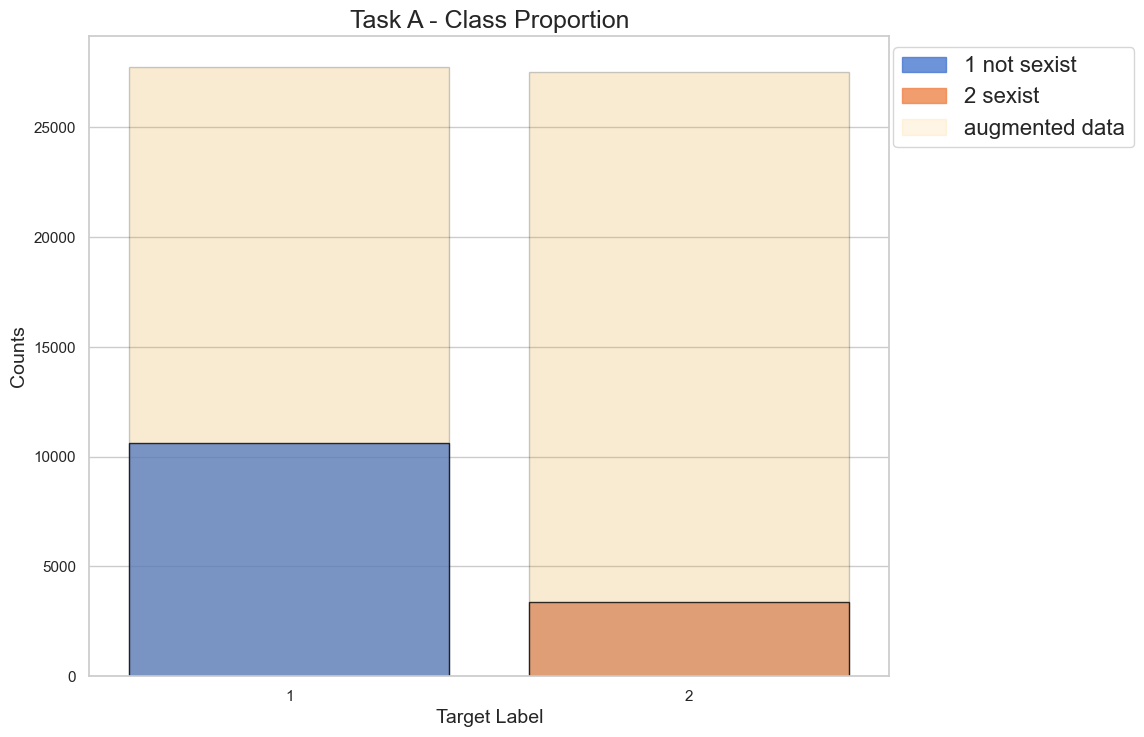

In [326]:
GAB_task_a_sexist = GAB_task_a.loc[GAB_task_a['target_a'] == 1]
orig_len_GAB_sexist = len(GAB_task_a_sexist)

GAB_task_a_not_sexist = GAB_task_a.loc[GAB_task_a['target_a'] == 0]
orig_len_GAB_not_sexist = len(GAB_task_a_not_sexist)

reddit_task_a_sexist = reddit_task_a.loc[reddit_task_a['target_a'] == 1]
orig_len_reddit_sexist = len(reddit_task_a_sexist)

reddit_task_a_not_sexist = reddit_task_a.loc[reddit_task_a['target_a'] == 0]
orig_len_reddit_not_sexist = len(reddit_task_a_not_sexist)

aug_task_a_sexist = pd.concat([train_task_a,
                               GAB_task_a_sexist.sample(int(orig_len_GAB_sexist * 1)),
                               GAB_task_a_not_sexist.sample(int(orig_len_GAB_not_sexist * 0.013)),
                               reddit_task_a_sexist.sample(int(orig_len_reddit_sexist * 1)),
                               reddit_task_a_not_sexist.sample(int(orig_len_reddit_not_sexist * 0.013))
                        ])

plt.figure(figsize=(10, 8))
sns.set_theme(style="whitegrid")

plt.ylabel("Counts", size=14)
plt.xlabel("Target Label", size=14)
plt.title("Task A - Class Proportion", size=18)

# Count the number of occurrences of each class label
counts = train_task_a['target_a'].value_counts()
counts1 = aug_task_a_sexist['target_a'].value_counts()

# Sort the counts in descending order
counts = counts.sort_values(ascending=False)
counts1 = counts1.sort_values(ascending=False)

# Create a bar plot using Seaborn
palette = sns.color_palette("muted")

sns.barplot(x=counts1.index, y=counts1.values, order=counts1.index, color='orange',
            edgecolor="black", alpha=0.2)

sns.barplot(x=counts.index, y=counts.values, order=counts.index, palette=palette,
            edgecolor="black", alpha=0.8)





labels = ['1 not sexist', '2 sexist']
labels_axis = ['1', '2']
plt.xticks([0, 1], labels_axis)

# Create proxy artists for the legend
proxy_artists = []
for i, (label, color) in enumerate(zip(labels, palette)):
    proxy_artists.append(mpatches.Patch(color=color, label=label, edgecolor='black', alpha=0.8))
    if i == 1:
        # Add a separate bar for augmented data
        proxy_artists.append(mpatches.Patch(color='orange', label="augmented data", edgecolor='black', alpha=0.1))

# Create the legend
plt.legend(handles=proxy_artists, loc='upper right', fontsize=14, bbox_to_anchor=(1.32, 1.0))
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)

In [345]:
crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)

In [353]:
crashes.sort_values("total", ascending=False).head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
40,23.9,9.082,9.799,22.944,19.359,858.97,116.29,SC
34,23.9,5.497,10.038,23.661,20.554,688.75,109.72,ND
48,23.8,8.092,6.664,23.086,20.706,992.61,152.56,WV
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
17,21.4,4.066,4.922,16.692,16.264,872.51,137.13,KY


In [384]:
labels

['1 not sexist', '2 sexist']

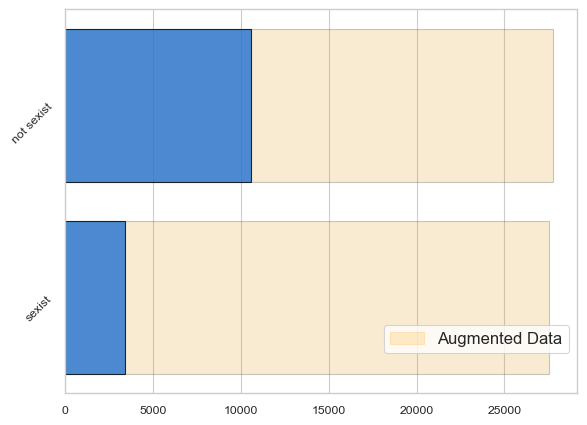

In [513]:
# plt.xlabel("Counts", size=14)
# plt.ylabel("Target Label", size=14)
# plt.title("Task A - Class Proportion", size=18)
sns.set_context("paper")
# Count the number of occurrences of each class label
counts = train_task_a['target_a'].value_counts()
counts1 = aug_task_a_sexist['target_a'].value_counts()

# Create a horizontal bar plot using Seaborn
palette = sns.color_palette("muted")

ax = sns.barplot(x=counts1.values, y=counts1.index, order=counts1.index, color='orange', orient='h',
            edgecolor="black", alpha=0.2)

cerulean_blue = (0.02, 0.43, 0.93)
ax = sns.barplot(x=counts.values, y=counts.index, color=cerulean_blue, orient='h',
            edgecolor="black", alpha=0.8)


# Set y-axis tick labels
ax.set_yticklabels(['not sexist', 'sexist'])
plt.yticks(rotation=45)
# labels = ['1 not sexist', '2 sexist']
# labels_axis = ['1', '2']
# plt.yticks([0, 1], labels_axis)

proxy_artists = [mpatches.Patch(color='orange', label='Augmented Data', alpha=0.2)]
# # Create the legend
plt.legend(handles=proxy_artists, loc='upper right', fontsize=12, bbox_to_anchor=(1, 0.2))
# plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)
# aug_task_a.to_csv(Path(AUGMENTED_DATA_DIR, f"augmented_task_a.csv"), index=False)
# plt.savefig('TaskA-ClassProportion-FINALE_roberta_large.png', dpi=500)

In [303]:
aug_task_file = pd.concat([train_task_a,
                               GAB_task_a_sexist.sample(int(orig_len_GAB_sexist * 1)),
                               GAB_task_a_not_sexist.sample(int(orig_len_GAB_not_sexist * 0.013)),
                               reddit_task_a_sexist.sample(int(orig_len_reddit_sexist * 1)),
                               reddit_task_a_not_sexist.sample(int(orig_len_reddit_not_sexist * 0.013))
                        ])

aug_task_file.to_csv("task_a_balanced.csv", index=False)

threats, plans to harm and incitement: 310
derogation: 1590
animosity: 1165
prejudiced discussions: 333
total sexist task b: 3398
augmented dataset b count: 6847, aug ratio: 2.0150088287227783


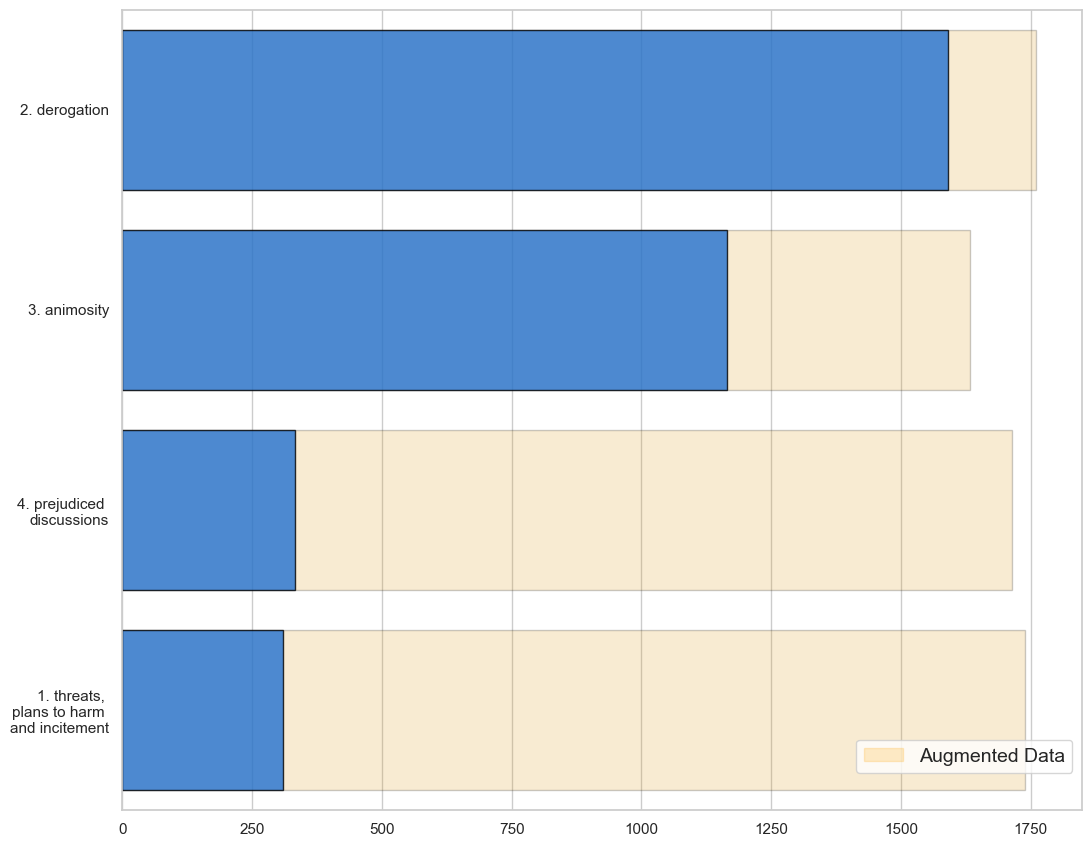

In [511]:
# Explore task b
# train_task_b = train_df.drop(['rewire_id', 'target_a', 'target_c'], axis=1)
train_task_b = train_df.copy()
train_task_b = train_task_b.loc[train_task_b['target_b'] != -1]

b1 = train_task_b.loc[train_task_b['target_b'] == 0]
b1_aug_syn = train_aug_synonym.loc[train_aug_synonym['target_b'] == 0]
b1_aug_insertion = train_aug_insertion.loc[train_aug_insertion['target_b'] == 0]
b1_aug_swap = train_rand_swap.loc[train_rand_swap['target_b'] == 0]
b1_sf = train_self_training.loc[train_self_training['target_b'] == 0]
b1_sfr = train_self_training_reddit.loc[train_self_training_reddit['target_b'] == 0]
b1_sfr_insert = train_aug_insertion_sf.loc[train_aug_insertion_sf['target_b'] == 0]
b1_sfr_syn = train_aug_synonym_sf.loc[train_aug_synonym_sf['target_b'] == 0]
print(f"threats, plans to harm and incitement: {len(b1)}")

b2 = train_task_b.loc[train_task_b['target_b'] == 1]
b2_aug_syn = train_aug_synonym.loc[train_aug_synonym['target_b'] == 1]
b2_aug_insertion = train_aug_insertion.loc[train_aug_insertion['target_b'] == 1]
b2_sf = train_self_training.loc[train_self_training['target_b'] == 1]
b2_sfr = train_self_training_reddit.loc[train_self_training_reddit['target_b'] == 1]
b2_sfr_insert = train_aug_insertion_sf.loc[train_aug_insertion_sf['target_b'] == 1]
b2_sfr_syn = train_aug_synonym_sf.loc[train_aug_synonym_sf['target_b'] == 1]
print(f"derogation: {len(b2)}")

b3 = train_task_b.loc[train_task_b['target_b'] == 2]
b3_aug_syn = train_aug_synonym.loc[train_aug_synonym['target_b'] == 2]
b3_aug_insertion = train_aug_insertion.loc[train_aug_insertion['target_b'] == 2]
b3_sf = train_self_training.loc[train_self_training['target_b'] == 2]
b3_sfr = train_self_training_reddit.loc[train_self_training_reddit['target_b'] == 2]
b3_sfr_insert = train_aug_insertion_sf.loc[train_aug_insertion_sf['target_b'] == 2]
b3_sfr_syn = train_aug_synonym_sf.loc[train_aug_synonym_sf['target_b'] == 2]
print(f"animosity: {len(b3)}")

b4 = train_task_b.loc[train_task_b['target_b'] == 3]
b4_aug_syn = train_aug_synonym.loc[train_aug_synonym['target_b'] == 3]
b4_aug_insertion = train_aug_insertion.loc[train_aug_insertion['target_b'] == 3]
b4_aug_swap = train_rand_swap.loc[train_rand_swap['target_b'] == 3]
b4_sf = train_self_training.loc[train_self_training['target_b'] == 3]
b4_sfr = train_self_training_reddit.loc[train_self_training_reddit['target_b'] == 3]
b4_sfr_insert = train_aug_insertion_sf.loc[train_aug_insertion_sf['target_b'] == 3]
b4_sfr_syn = train_aug_synonym_sf.loc[train_aug_synonym_sf['target_b'] == 3]
print(f"prejudiced discussions: {len(b4)}")

print(f"total sexist task b: {len(pd.concat([b1, b2, b3, b4]))}")

aug_task_b = pd.concat([train_task_b,
                        b1_aug_insertion.sample(int(len(b1) * 0)),
                        b1_aug_syn.sample(int(len(b1) * 0)),
                        b1_aug_swap.sample(int(len(b1) * 0)),
                        b1_sfr_insert.sample(int(len(b1_sfr_insert) * 0)),
                        b1_sfr_syn.sample(int(len(b1_sfr_syn) * 0)),

                        b2_aug_insertion.sample(int(len(b2) * 0)),
                        b2_aug_syn.sample(int(len(b2) * 0)),
                        b2_sfr_insert.sample(int(len(b2_sfr_insert) * 0)),
                        b2_sfr_syn.sample(int(len(b2_sfr_syn) * 0)),

                        b3_aug_insertion.sample(int(len(b3) *0)),
                        b3_aug_syn.sample(int(len(b3) * 0)),
                        b3_sfr_insert.sample(int(len(b3_sfr_insert) * 0)),
                        b3_sfr_syn.sample(int(len(b3_sfr_syn) * 0)),

                        b4_aug_syn.sample(int(len(b4) * 0)),
                        b4_aug_insertion.sample(int(len(b4) * 0)),
                        b4_aug_swap.sample(int(len(b4) * 0)),
                        b4_sfr_insert.sample(int(len(b4_sfr_insert) * 0)),
                        b4_sfr_syn.sample(int(len(b4_sfr_syn) * 0)),

                        b1_sf.sample(int(len(b1_sf) * 1)),
                        b2_sf.sample(int(len(b2_sf) * 1)),
                        b3_sf.sample(int(len(b3_sf) * 1)),
                        b4_sf.sample(int(len(b4_sf) * 1)),

                        b1_sfr.sample(int(len(b1_sfr) * 1)),
                        b2_sfr.sample(int(len(b2_sfr) * 0.4)),
                        b3_sfr.sample(int(len(b3_sfr) * 1)),
                        b4_sfr.sample(int(len(b4_sfr) * 0.6))])

print(f"augmented dataset b count: {len(aug_task_b)}, aug ratio: {len(aug_task_b)/len(train_task_b)}")

# aug_task_b.to_csv(Path(AUGMENTED_DATA_DIR, f"augmented_task_b.csv"), index=False)

sns.set_context("paper")
plt.figure(figsize=(12, 10))
sns.set_theme(style="whitegrid")

# plt.ylabel("Counts", size=14)
# plt.xlabel("Target Label", size=14)
# plt.title("Task B - Class Proportion", size=18)

# Count the number of occurrences of each class label
counts = train_task_b['target_b'].value_counts()
counts1 = aug_task_b['target_b'].value_counts()

# Create a bar plot using Seaborn
palette = sns.color_palette("muted")

sns.barplot(x=counts1.values, y=counts1.index, color='orange', order=counts.index, edgecolor="black", alpha=0.2, orient='h')

cerulean_blue = (0.02, 0.43, 0.93)
ax = sns.barplot(x=counts.values, y=counts.index, order=counts.index, color=cerulean_blue, orient='h',
            edgecolor="black", alpha=0.8)

ax.set_yticklabels(['2. derogation', '3. animosity', '4. prejudiced \ndiscussions', '1. threats, \nplans to harm \nand '
                                                                                    'incitement'])
plt.yticks(rotation=0)

# labels = ['1 derogation', '2 animosity', '3 prejudiced discussions', '4 threats, plans to harm and incitement']
# labels_axis = ['1', '2', '3', '4']
# plt.xticks([0, 1, 2, 3], labels_axis)

# Create proxy artists for the legend
# proxy_artists = []
# for i, (label, color) in enumerate(zip(labels, palette)):
#     proxy_artists.append(mpatches.Patch(color=color, label=label, edgecolor='black', alpha=1))
#     if i == 3:
#         # Add a separate bar for augmented data
#         proxy_artists.append(mpatches.Patch(color='orange', label="augmented data", edgecolor='black', alpha=0.1))
#
proxy_artists = [mpatches.Patch(color='orange', label='Augmented Data', alpha=0.2)]
# # Create the legend
plt.legend(handles=proxy_artists, loc='upper right', fontsize=14, bbox_to_anchor=(1, 0.1))
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)
# plt.savefig('TaskB-ClassProportion_aug_FINALE_roberta_large.png', dpi=500)

In [509]:
aug_task_file_b = pd.concat([train_task_b,
                        b1_sf.sample(int(len(b1_sf) * 1)),
                        b2_sf.sample(int(len(b2_sf) * 1)),
                        b3_sf.sample(int(len(b3_sf) * 1)),
                        b4_sf.sample(int(len(b4_sf) * 1)),

                         b1_sfr.sample(int(len(b1_sfr) * 1)),
                        b2_sfr.sample(int(len(b2_sfr) * 0.4)),
                        b3_sfr.sample(int(len(b3_sfr) * 1)),
                        b4_sfr.sample(int(len(b4_sfr) * 0.6))])

aug_task_file_b.to_csv("task_b_balanced_roberta_large_3fold.csv", index=False)

In [30]:
from src.data.text_processing import TextPreprocessor
text_preprocessor = TextPreprocessor(preprocessing_mode='none')

aug_task_b["text"] = text_preprocessor.transform_series(
    aug_task_b["text"]
)
aug_task_b = aug_task_b[aug_task_b['target_b'] != -1]
aug_task_b = aug_task_b.to_numpy()

In [32]:
aug_task_b[:, 1]

array(['[USER] Leg day is easy. Hot girls who wear miniskirts get asked out.',
       "I get a new pussy every other week or whenever i want really. Didnt have to learn how to either from YouTube videos. Also PUAs dont get laid. At best they get 5/10 asian ladies after spending years pretending to be something they aren't. Its pathetic",
       "O come on there's no way any men are attracted to her shes a pig🙄",
       ...,
       'With a rapist she is guaranteed to have a man finally touch her. A racist would just walk away.',
       "Woman in position of power >Somehow she's still the victim This is #gynocentrism.",
       'She could easily seduce students and still keep her teaching certificate'],
      dtype=object)

In [321]:
# Explore task c
train_task_c = train_df.drop(['rewire_id', 'target_a', 'target_b'], axis=1)
train_task_c = train_task_c.loc[train_task_c['target_c'] != -1]

In [324]:
train_task_c['target_c'].value_counts()

2     717
3     673
5     637
6     417
10    258
1     254
4     200
9      75
7      64
0      56
8      47
Name: target_c, dtype: int64

In [ ]:
GAB_task_a_sexist = GAB_task_a.loc[GAB_task_a['target_a'] == 1]
orig_len_GAB_sexist = len(GAB_task_a_sexist)

GAB_task_a_not_sexist = GAB_task_a.loc[GAB_task_a['target_a'] == 0]
orig_len_GAB_not_sexist = len(GAB_task_a_not_sexist)

reddit_task_a_sexist = reddit_task_a.loc[reddit_task_a['target_a'] == 1]
orig_len_reddit_sexist = len(reddit_task_a_sexist)

reddit_task_a_not_sexist = reddit_task_a.loc[reddit_task_a['target_a'] == 0]
orig_len_reddit_not_sexist = len(reddit_task_a_not_sexist)

In [ ]:
train_task_c = train_df.drop(['rewire_id', 'target_a', 'target_b'], axis=1)
train_task_c = train_task_c.loc[train_task_c['target_c'] != -1]

b1 = train_task_b.loc[train_task_b['target_b'] == 0]
b1_aug_syn = train_aug_synonym.loc[train_aug_synonym['target_b'] == 0]
b1_aug_insertion = train_aug_insertion.loc[train_aug_insertion['target_b'] == 0]
print(f"1.1: {len(b1)}")

b2 = train_task_b.loc[train_task_b['target_b'] == 1]
b2_aug_syn = train_aug_synonym.loc[train_aug_synonym['target_b'] == 1]
b2_aug_insertion = train_aug_insertion.loc[train_aug_insertion['target_b'] == 1]
print(f"derogation: {len(b2)}")

b3 = train_task_b.loc[train_task_b['target_b'] == 2]
b3_aug_syn = train_aug_synonym.loc[train_aug_synonym['target_b'] == 2]
b3_aug_insertion = train_aug_insertion.loc[train_aug_insertion['target_b'] == 2]
print(f"animosity: {len(b3)}")

b4 = train_task_b.loc[train_task_b['target_b'] == 3]
b4_aug_syn = train_aug_synonym.loc[train_aug_synonym['target_b'] == 3]
b4_aug_insertion = train_aug_insertion.loc[train_aug_insertion['target_b'] == 3]
print(f"prejudiced discussions: {len(b4)}")

print(f"total sexist task b: {len(pd.concat([b1, b2, b3, b4]))}")

aug_task_b = pd.concat([train_task_b,
                        b1_aug_insertion, b1_aug_syn,
                        b2_aug_insertion.sample(int(len(b2)*0.5)),
                        b3_aug_insertion.sample(int(len(b3)*0.5)),
                        b4_aug_syn, b4_aug_insertion])

print(f"augmented dataset b count: {len(aug_task_b)}, aug ratio: {len(train_task_b)/len(aug_task_b)*100}")

In [540]:
train_self_training_FULL = pd.read_csv(os.path.join(PROCESSED_DATA_DIR, "probs_task_c_roberta_large.csv"))
unlabeled_task_text = pd.read_csv(os.path.join(PROCESSED_DATA_DIR, "unlabeled_task_c_roberta_large.csv"))

In [541]:
train_task_c = train_df.drop(['rewire_id', 'target_a', 'target_b'], axis=1)
train_task_c = train_task_c.loc[train_task_c['target_c'] != -1]
train_task_c['target_c'].value_counts()

2     717
3     673
5     637
6     417
10    258
1     254
4     200
9      75
7      64
0      56
8      47
Name: target_c, dtype: int64

In [557]:
import numpy as np
probs = np.array(train_self_training_FULL).copy()

# Set a confidence threshold for pseudo-labeling
confidence_threshold = 0.8

# Get the most confident predictions and their indices
most_confident_indices = np.where(probs.max(axis=1) > confidence_threshold)[0]
most_confident_preds = pd.DataFrame(probs.argmax(axis=1)[most_confident_indices])

text_task_c = unlabeled_task_text.iloc[most_confident_indices].reset_index(drop=True)

final_task_c = pd.concat([text_task_c, most_confident_preds],axis=1)
final_task_c

,text,0
0,Or just the sound of a 9mm blowing the stupid ...,5
1,It makes the tradcucks happy. If you don’t say...,5
2,yes exactly correct. women have no moral compa...,2
3,The criminals are the govt. and their whore ju...,5
4,"Love the shirt!! Also, I really don't and will...",5
...,...,...
17032,theredpill is not a dick swinging contest abou...,5
17033,"If you are not married, you are lucky. Stay th...",2
17034,Better to clothes line her like the parking lo...,1
17035,"[USER] sadly not, Raul just made him look like...",5


In [552]:
unique_values, counts = np.unique(most_confident_preds, return_counts=True)

for value, count in zip(unique_values, counts):
    print(f"{value}: {count}")

1: 509
2: 1354
3: 70
4: 38
5: 13227
6: 830
9: 5
10: 1004


In [581]:
len(most_confident_preds)

17037

In [586]:
final_task_c

,text,target_c
0,Or just the sound of a 9mm blowing the stupid ...,5
1,It makes the tradcucks happy. If you don’t say...,5
2,yes exactly correct. women have no moral compa...,2
3,The criminals are the govt. and their whore ju...,5
4,"Love the shirt!! Also, I really don't and will...",5
...,...,...
17032,theredpill is not a dick swinging contest abou...,5
17033,"If you are not married, you are lucky. Stay th...",2
17034,Better to clothes line her like the parking lo...,1
17035,"[USER] sadly not, Raul just made him look like...",5


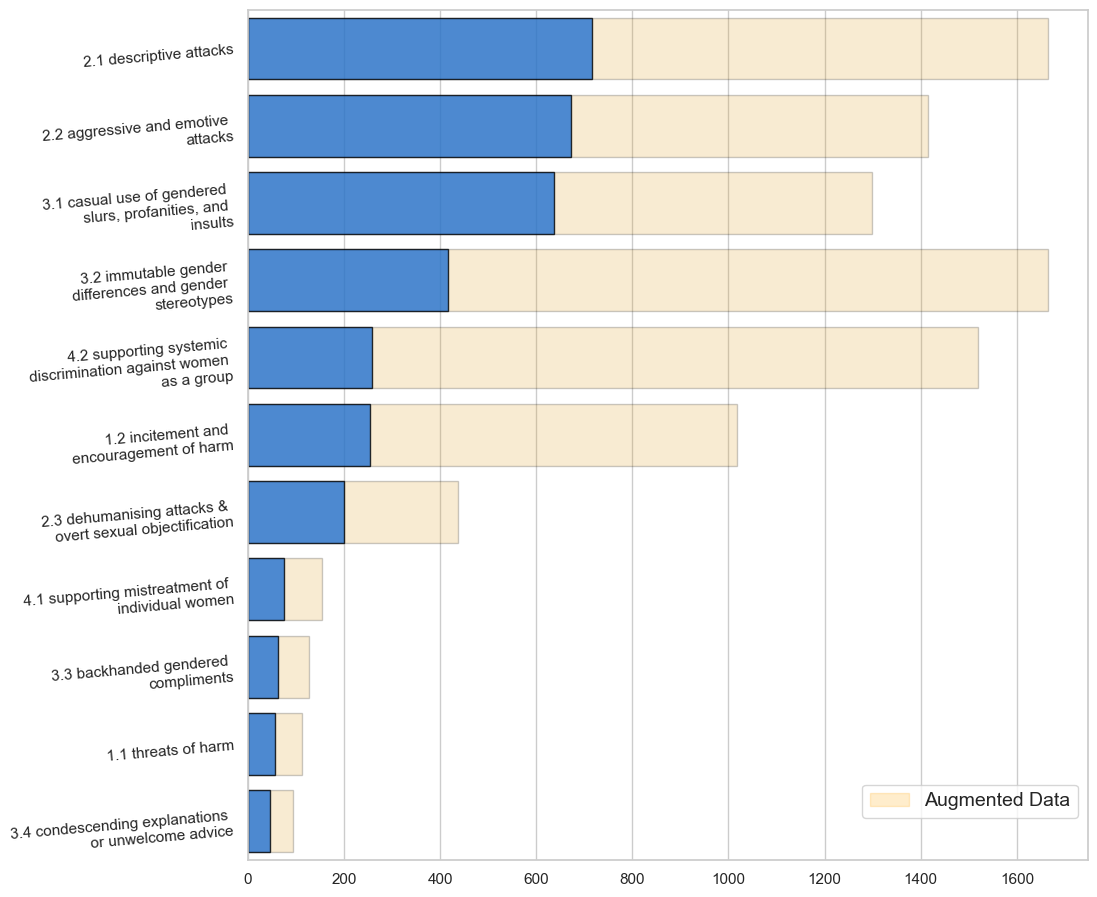

In [602]:
train_task_c = train_df.copy()
train_task_c = train_task_c.loc[train_task_c['target_c'] != -1]
final_task_c = final_task_c.rename(columns={0: 'target_c'})

# final_task_c_wo3_5 = final_task_c.loc[(final_task_c['target_c'] != 5) & (final_task_c['target_c'] != 3)]
final_task_c_wo25 = final_task_c.loc[(final_task_c['target_c'] != 5)  & (final_task_c['target_c'] != 2)]
orig_5 = len(final_task_c_wo5['target_c'])

final_task_c_w5 = final_task_c.loc[final_task_c['target_c'] == 5]
orig_5 = len(final_task_c_w5['target_c'])
#
final_task_c_w2 = final_task_c.loc[final_task_c['target_c'] == 2]
orig_2 = len(final_task_c_w2['target_c'])

orig_0 = len(train_aug_insertion.loc[train_aug_insertion['target_c'] == 0])
orig_1 = len(train_aug_insertion.loc[train_aug_insertion['target_c'] == 1])
orig_3 = len(train_aug_insertion.loc[train_aug_insertion['target_c'] == 3])
orig_4 = len(train_aug_insertion.loc[train_aug_insertion['target_c'] == 4])
orig_6 = len(train_aug_insertion.loc[train_aug_insertion['target_c'] == 6])
orig_7 = len(train_aug_insertion.loc[train_aug_insertion['target_c'] == 7])
orig_8 = len(train_aug_insertion.loc[train_aug_insertion['target_c'] == 8])
orig_9 = len(train_aug_insertion.loc[train_aug_insertion['target_c'] == 9])
orig_10 =len(train_aug_insertion.loc[train_aug_insertion['target_c'] == 10])

train_task_c['target_c'].value_counts()
#%
aug_task_c = pd.concat([train_task_c,
                        final_task_c_wo25,
                        final_task_c_w2.sample(int(orig_2 * 0.7)),
                        final_task_c_w5.rename(columns={'0': 'text'}).sample(int(orig_5 * 0.05)),
                        train_aug_insertion.loc[train_aug_insertion['target_c'] == 0].sample(int(orig_0 * 1)),
                        train_aug_insertion.loc[train_aug_insertion['target_c'] == 1].sample(int(orig_1 * 1)),
                        train_aug_insertion.loc[train_aug_insertion['target_c'] == 3].sample(int(orig_3 * 1)),
                        train_aug_insertion.loc[train_aug_insertion['target_c'] == 4].sample(int(orig_4 * 1)),
                        train_aug_insertion.loc[train_aug_insertion['target_c'] == 6].sample(int(orig_6 * 1)),
                        train_aug_insertion.loc[train_aug_insertion['target_c'] == 7].sample(int(orig_7 * 1)),
                        train_aug_insertion.loc[train_aug_insertion['target_c'] == 8].sample(int(orig_8 * 1)),
                        train_aug_insertion.loc[train_aug_insertion['target_c'] == 9].sample(int(orig_9 * 1)),
                        train_aug_insertion.loc[train_aug_insertion['target_c'] == 10].sample(int(orig_10 * 1))
                        ])
#                         final_task_c_wo3_5,
#                         final_task_c_w5.sample(int(orig_5 * 0.05)),
#                         final_task_c_w3.sample(int(orig_3 * 0.2)),
#                         train_aug_insertion.loc[train_aug_insertion['target_c'] == 0].sample(int(orig_0 * 1)),
#                         train_aug_insertion.loc[train_aug_insertion['target_c'] == 1].sample(int(orig_1 * 1)),
#                         train_aug_insertion.loc[train_aug_insertion['target_c'] == 3].sample(int(orig_3 * 0)),
#                         train_aug_insertion.loc[train_aug_insertion['target_c'] == 4].sample(int(orig_4 * 1)),
#                         train_aug_insertion.loc[train_aug_insertion['target_c'] == 6].sample(int(orig_6 * 0.8)),
#                         train_aug_insertion.loc[train_aug_insertion['target_c'] == 7].sample(int(orig_7 * 1)),
#                         train_aug_insertion.loc[train_aug_insertion['target_c'] == 8].sample(int(orig_8 * 1)),
#                         train_aug_insertion.loc[train_aug_insertion['target_c'] == 9].sample(int(orig_9 * 1)),
#                         train_aug_insertion.loc[train_aug_insertion['target_c'] == 10].sample(int(orig_10 * 1))
# ])

# sns.set_context("paper")
plt.figure(figsize=(12, 10))
sns.set_theme(style="whitegrid")


# Count the number of occurrences of each class label
counts = train_task_c['target_c'].value_counts()
counts1 = aug_task_c['target_c'].value_counts()

# Create a bar plot using Seaborn
palette = sns.color_palette("muted")

sns.barplot(x=counts1.values, y=counts1.index, color='orange', order=counts.index, edgecolor="black", alpha=0.2, orient='h')

cerulean_blue = (0.02, 0.43, 0.93)
ax = sns.barplot(x=counts.values, y=counts.index, order=counts.index, color=cerulean_blue, orient='h',
            edgecolor="black", alpha=0.8)

ax.set_yticklabels(['2.1 descriptive attacks',
                    '2.2 aggressive and emotive \nattacks',
                    '3.1 casual use of gendered \nslurs, profanities, and \ninsults',
                    '3.2 immutable gender \ndifferences and gender \nstereotypes',
                    '4.2 supporting systemic \ndiscrimination against women \nas a group',
                    '1.2 incitement and \nencouragement of harm',
                    '2.3 dehumanising attacks & \novert sexual objectification',
                    '4.1 supporting mistreatment of \nindividual women',
                    '3.3 backhanded gendered \ncompliments',
                    '1.1 threats of harm',
                    '3.4 condescending explanations \nor unwelcome advice',
                    ])
plt.yticks(rotation=5)

# labels = ['1 derogation', '2 animosity', '3 prejudiced discussions', '4 threats, plans to harm and incitement']
# labels_axis = ['1', '2', '3', '4']
# plt.xticks([0, 1, 2, 3], labels_axis)

# Create proxy artists for the legend
# proxy_artists = []
# for i, (label, color) in enumerate(zip(labels, palette)):
#     proxy_artists.append(mpatches.Patch(color=color, label=label, edgecolor='black', alpha=1))
#     if i == 3:
#         # Add a separate bar for augmented data
#         proxy_artists.append(mpatches.Patch(color='orange', label="augmented data", edgecolor='black', alpha=0.1))
#
proxy_artists = [mpatches.Patch(color='orange', label='Augmented Data', alpha=0.2)]
# # Create the legend
plt.legend(handles=proxy_artists, loc='upper right', fontsize=14, bbox_to_anchor=(1, 0.1))
plt.subplots_adjust(left=0.2, right=0.9, bottom=0.05, top=0.9)
# plt.savefig('TaskC-ClassProportion_aug_FINALE_roberta_large.png', dpi=500)

In [603]:
aug_task_file_c = pd.concat([train_task_c,
                        final_task_c_wo25,
                        final_task_c_w2.sample(int(orig_2 * 0.7)),
                        final_task_c_w5.rename(columns={'0': 'text'}).sample(int(orig_5 * 0.05)),
                        train_aug_insertion.loc[train_aug_insertion['target_c'] == 0].sample(int(orig_0 * 1)),
                        train_aug_insertion.loc[train_aug_insertion['target_c'] == 1].sample(int(orig_1 * 1)),
                        train_aug_insertion.loc[train_aug_insertion['target_c'] == 3].sample(int(orig_3 * 1)),
                        train_aug_insertion.loc[train_aug_insertion['target_c'] == 4].sample(int(orig_4 * 1)),
                        train_aug_insertion.loc[train_aug_insertion['target_c'] == 6].sample(int(orig_6 * 1)),
                        train_aug_insertion.loc[train_aug_insertion['target_c'] == 7].sample(int(orig_7 * 1)),
                        train_aug_insertion.loc[train_aug_insertion['target_c'] == 8].sample(int(orig_8 * 1)),
                        train_aug_insertion.loc[train_aug_insertion['target_c'] == 9].sample(int(orig_9 * 1)),
                        train_aug_insertion.loc[train_aug_insertion['target_c'] == 10].sample(int(orig_10 * 1))
                        ])

aug_task_file_c_suffled = aug_task_file_c.sample(frac=1, replace=False)
# aug_task_file_c_suffled.to_csv("task_c_balanced_robertalarge.csv", index=False)

In [605]:
aug_task_file_c_suffled

,rewire_id,text,target_a,target_b,target_c
10821,NaN,"Did she rape any underage boys? If so, guillot...",NaN,NaN,1
14946,NaN,"Wrong. Narcissism, pure and simple. Everything...",NaN,NaN,2
13014,NaN,what a classless old hag,NaN,NaN,3
11370,sexism2022_english-1507,Faggots deserve to be burned you little cunt. ...,1.0,2.0,5
824,NaN,makes me feel good I look young and youthful. ...,NaN,NaN,6
...,...,...,...,...,...
10084,sexism2022_english-406,"ladies, let's give a new paradigm a few centur...",1.0,1.0,3
10693,NaN,"If the Church doesn't excommunicate her, then ...",NaN,NaN,1
765,sexism2022_english-4390,All sex outside of marriage is fornication Ang...,1.0,1.0,2
9317,NaN,"Boobs and butts are, boobs and butts. But if s...",NaN,NaN,4
